<h1 align="center">Estadística de los números de ocupación del gas ideal cuántico y clásico</h1>
<div align="right">David A. Miranda, PhD<br>2022</div>

## 1. Importar librería

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## 2. Planteamiento del problema

Sea un gas ideal formado por $N$ partículas que ocupan un volumen $V$; dicho gas está a una temperatura absoluta $T$, con $\beta=1/k_B T$ y su potencial químico es $\mu$. El valor esperado $\langle n_E \rangle$ del número de ocupación del estado con energía entre $E$ y $E+\delta E$ está dado por:

$$ \langle n_E \rangle = \frac{1}{e^{\beta(E-\mu)}+a} \qquad (1)$$

Donde, $a=1$ para fermiones (distribución de Fermi-Dirac); $a=-1$, para bosones (distribución de Bosé-Einstein) y $a=0$ para partículas clásicas (distribución de Maxwell-Boltzman).

La desviación estándar $\sigma_{n_E}$ del número de ocupación del estado con energía entre $E$ y $E+\delta E$ está dado por:

$$ \sigma = \langle n_E \rangle \sqrt{ \frac{1}{\langle n_E \rangle} - a  } \qquad (2)$$

¿Cómo se comporta el número valor esperado del número de ocupación del estado $E$ para partículas cuánticas (fermiones y bosones) y clásicas?

Ver [expicación](https://youtu.be/O7GVdSPE0x0).

## 3. Definiciones y métodos 

In [2]:
statistics = {
     1: 'Fermi-Dirac',
    -1: 'Bose-Einstein',
     0: 'Maxwell-Boltzmann'
}

In [3]:
def mean_occupation_number(x, a):
    n = 1/( np.exp(x) + a )
    n[n<0] = np.NaN
    return n

In [4]:
def std_occupation_number(x, a):
    mean_nE = mean_occupation_number(x, a)
    σ = mean_nE * np.sqrt( 1/mean_nE - a )
    return σ

In [5]:
def plot(a, color='k', lw=2, alpha=0.2, marker='+'):
    label = statistics[a]
    x  = np.linspace(-3, 3, 1000)
    xe = np.linspace(-2+a/2, 3, 10)
    n  = mean_occupation_number(x, a)
    ne = mean_occupation_number(xe, a)
    σ  = std_occupation_number(x, a)
    σe = std_occupation_number(xe, a)
    plt.plot(x, n, color=color, label=label, lw=2)
    for k in range(len(xe)):
        plt.vlines(xe[k], ne[k]-σe[k], ne[k]+σe[k], color=color, alpha=alpha)
    plt.xlim(min(x), max(x))

## 4. Figuras

/Users/david/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


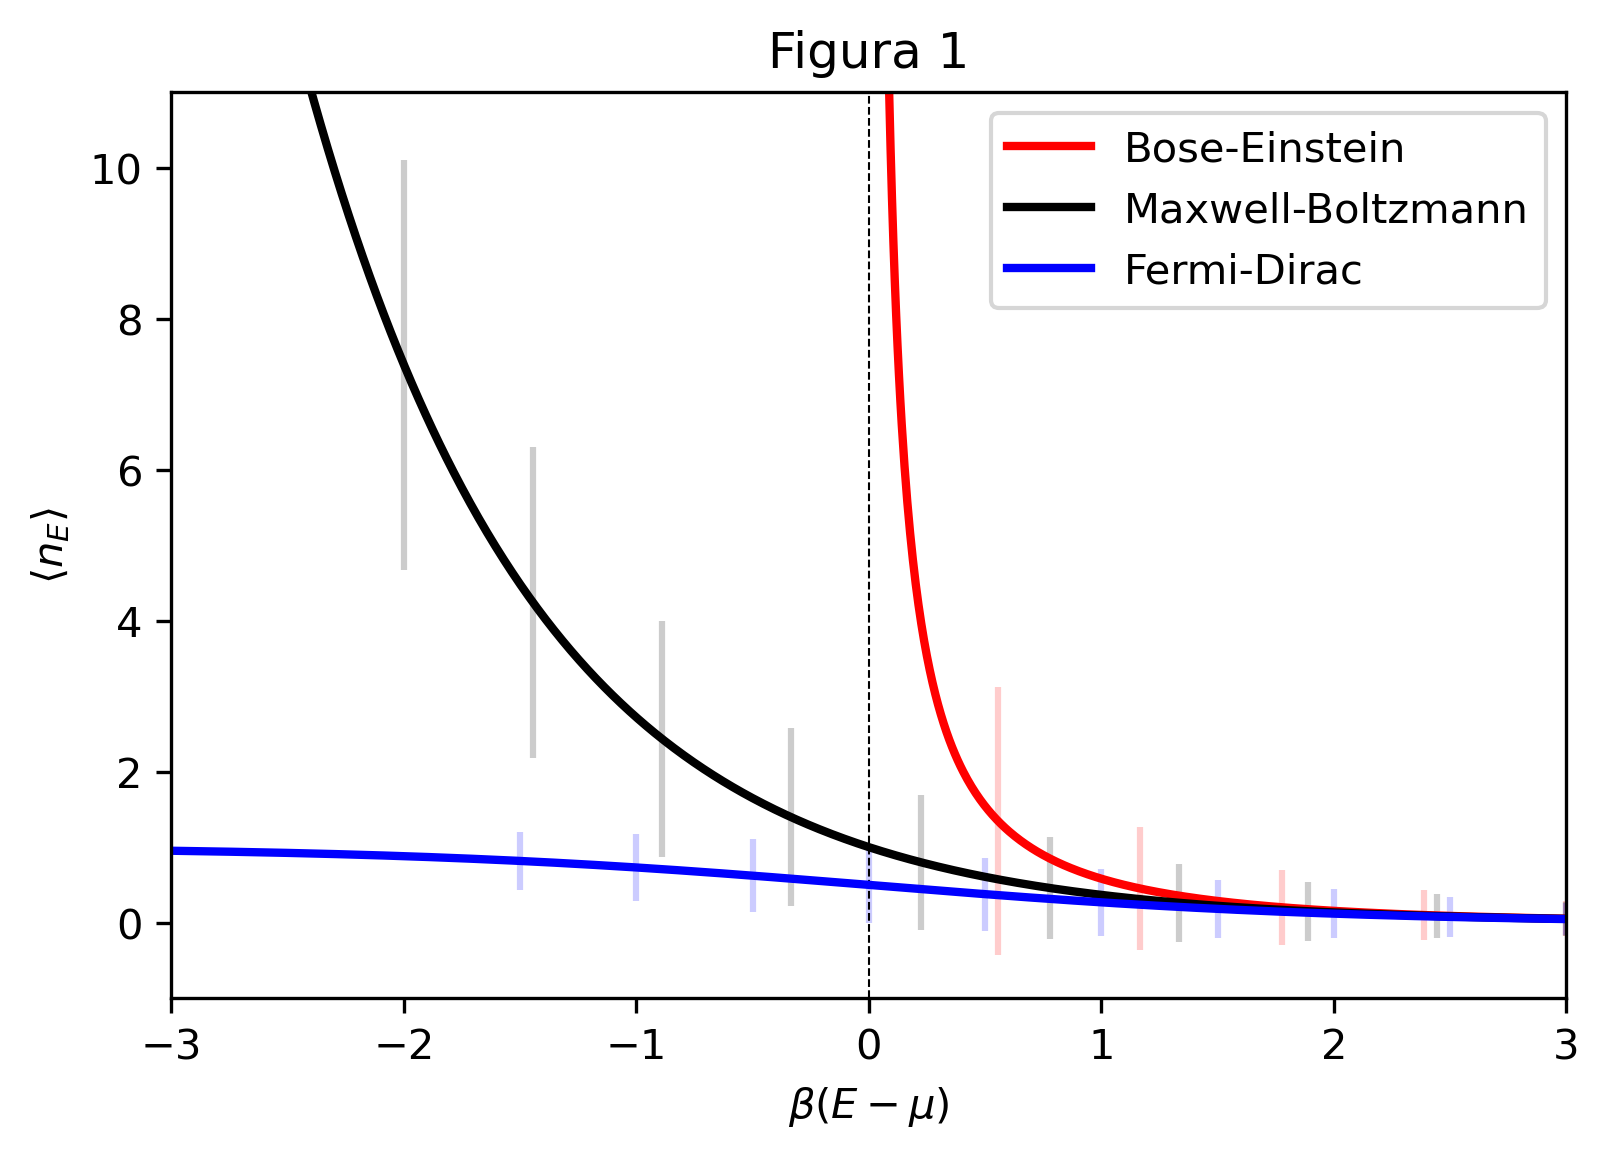

In [6]:
plt.figure(dpi=300)
ylim = [-1, 11]
color = ['r', 'k', 'b']
for i, a in enumerate([-1, 0, 1]):
    plot(a, color[i])
plt.legend()
plt.ylim(ylim[0], ylim[1])
plt.vlines(0, ylim[0], ylim[1], color='k', linestyles='--', lw=0.5)
plt.xlabel(r'$\beta(E-\mu)$')
plt.ylabel(r'$\langle n_E \rangle $')
_ = plt.title('Figura 1')

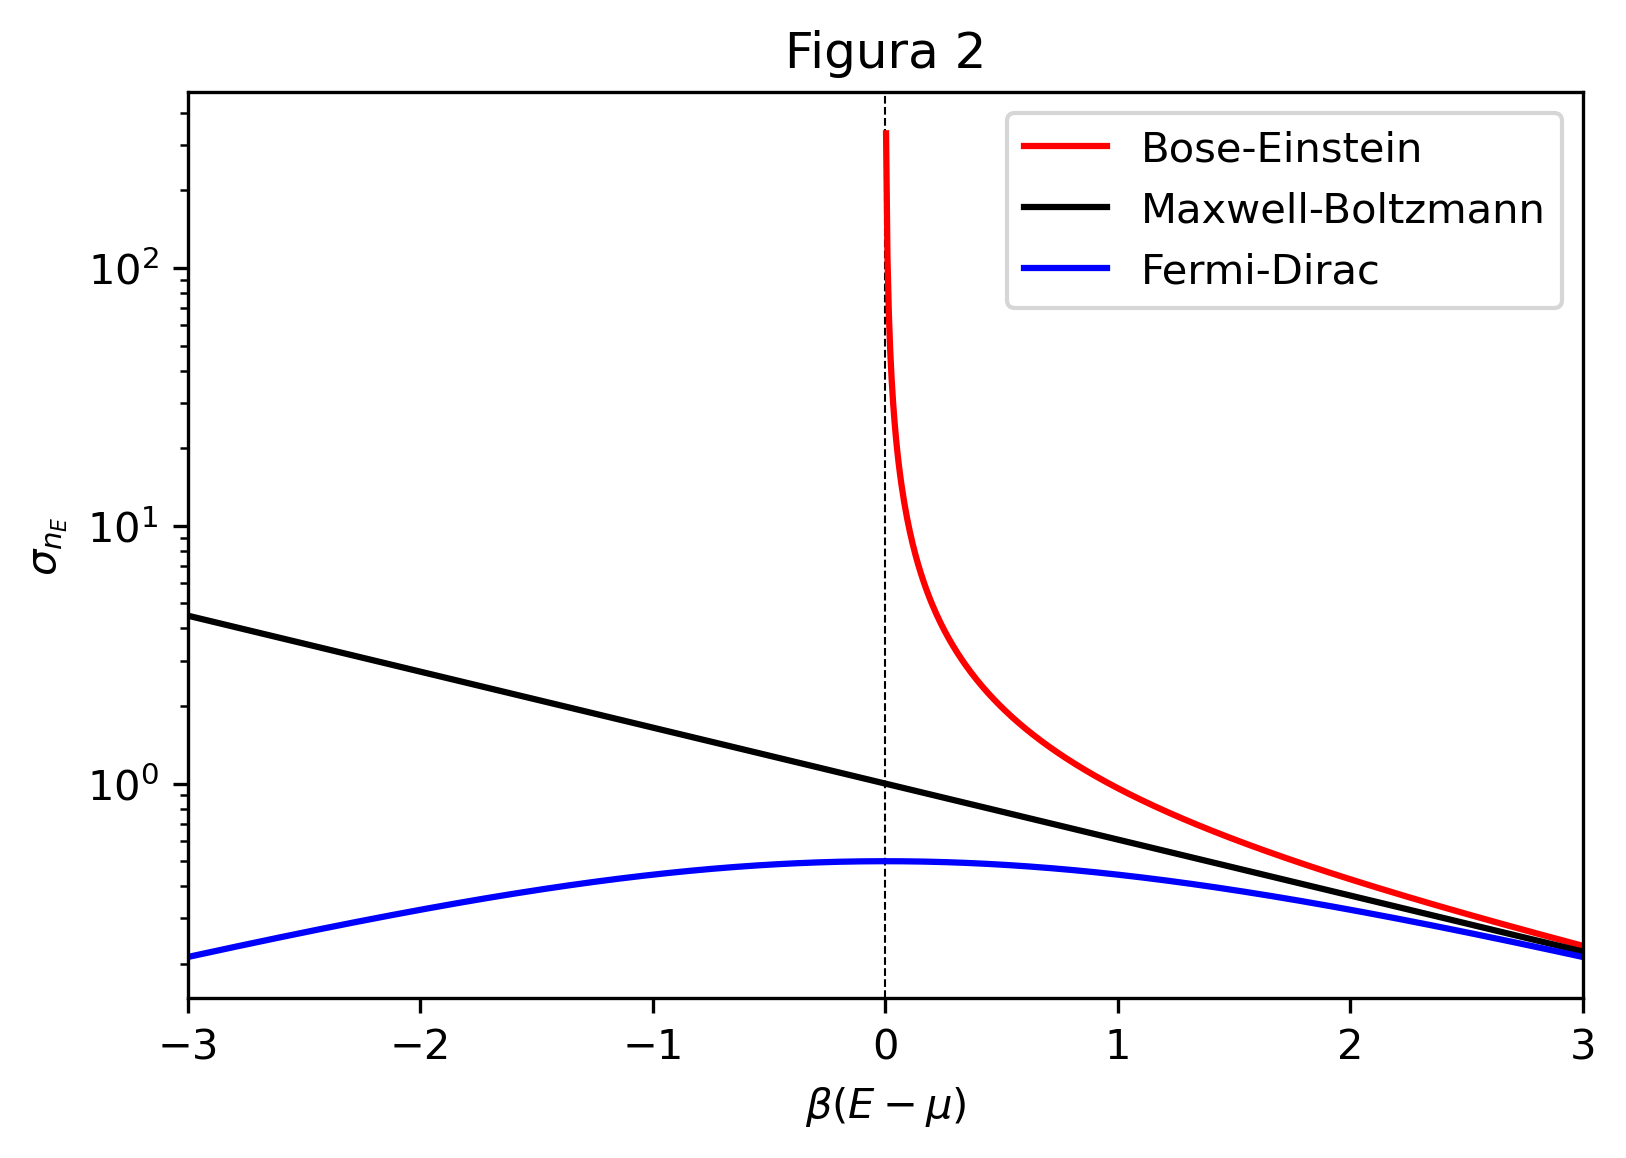

In [7]:
plt.figure(dpi=300)
ylim = [-1, 11]
color = ['r', 'k', 'b']
x = np.linspace(-3, 3, 1000)
for i, a in enumerate([-1, 0, 1]):
    σ  = std_occupation_number(x, a)
    plt.semilogy(x, σ, color=color[i], label=statistics[a])
plt.legend()
ax = plt.axis()
plt.xlim(min(x), max(x))
plt.ylim(ax[2], ax[3])
plt.vlines(0, ax[2], ax[3], color='k', linestyles='--', lw=0.5)
plt.xlabel(r'$\beta(E-\mu)$')
plt.ylabel(r'$\sigma_{n_E}$')
_ = plt.title('Figura 2')

## 5. Preguntas de autoexplicación

5.1. Deduzca la ecuación (1).

5.2. Deduzca la ecuación (2).

5.3. Interprete la Figura 1.

5.4. Interprete la Figura 2. 

5.5. Para el caso de bosones, ¿cómo interpreta la condición para la cual el valor esperado del número de estados tiende a infinito? Si esto se ha observado experimentalmente, desriba el experimento y los resultados reportados.

End!